<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>CA0</b><br><br>Alireza Karimi</i></font></h1>
                <h1 align=center><font size=3 color="#045F5F">810101492</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>

# Phase 1: Preprocessing

First of all, 🙌 we need to use the Pandas library to read the CSV file and store it in a dataframe. We have two CSV files that we'll be working with: the train file and the test file. Let's start by storing the information from the train file in our train dataframe, which we'll call df.


### Reading book_train csv file by using pandas function

In [50]:
import pandas as pd
df = pd.read_csv("books_train.csv")
display(df)

,title,description,categories
0,ساختار نظریه‌های جامعه‌شناسی ایران,«ساختار نظریه‌های جامعه‌شناسی ایران» نوشته ابو...,جامعه‌شناسی
1,جامعه و فرهنگ کانادا,«جامعه و فرهنگ کانادا» از مجموعه کتاب‌های «جام...,جامعه‌شناسی
2,پرسش از موعود,پرسش‌های مختلفی درباره زندگی و شخصیت امام مهدی...,کلیات اسلام
3,موج، دریا,«موج دریا» به قلم مهری ماهوتی (-۱۳۴۰) و تصویرگ...,داستان کودک و نوجوانان
4,پرسش از غرب,«پرسش از غرب» به قلم دکتر اسماعیل شفیعی سروستا...,جامعه‌شناسی
...,...,...,...
2545,قضاوت‌‏های امیرمؤمنان حضرت علی علیه‏‌السلام,آنچه به عنوان قضاوت‌های امیرمؤمنان حضرت علی عل...,کلیات اسلام
2546,کراماتی از مهدی موعود(عج),زینب محمودی پژوهشگر دینی است.\r\nدر بخشی از پی...,کلیات اسلام
2547,انتقام، انتقام، انتقام,«انتقام، انتقام، انتقام» داستان‌گونه‌ای با زبا...,داستان کوتاه
2548,آن مرد می‌آید,«آن مرد می‌آید» به قلم سیده‌فاطمه موسوی و به ت...,داستان کودک و نوجوانان


### Creating a Set of All Categories
First, we need to create a set that contains all the different categories from our train dataframe. In addition to the individual categories, we will add a category that includes all of them. To achieve this, we can use the value_counts() function on our train dataframe to retrieve the unique categories and store them in a set.

In [51]:
all_cats = {"همه": len(df)}
all_cats.update(df.value_counts('categories'))
display(all_cats)

{'همه': 2550,
 'جامعه\u200cشناسی': 425,
 'داستان کوتاه': 425,
 'داستان کودک و نوجوانان': 425,
 'رمان': 425,
 'مدیریت و کسب و کار': 425,
 'کلیات اسلام': 425}

or in other word:

### P(c):probability of each category

In [52]:
c = df.value_counts('categories',normalize=True)
def prob_of_category_c(genre):
    return c[genre]
display(c)

categories
جامعه‌شناسی               0.166667
داستان کوتاه              0.166667
داستان کودک و نوجوانان    0.166667
رمان                      0.166667
مدیریت و کسب و کار        0.166667
کلیات اسلام               0.166667
Name: proportion, dtype: float64

As you can see, all the categories have the same probability. So, if we want to compare them with each other to understand which category our text belongs to, we can ignore the probability of category occurrence in our formula.

I have programmed the below code snippet to visualize the frequency of each category.

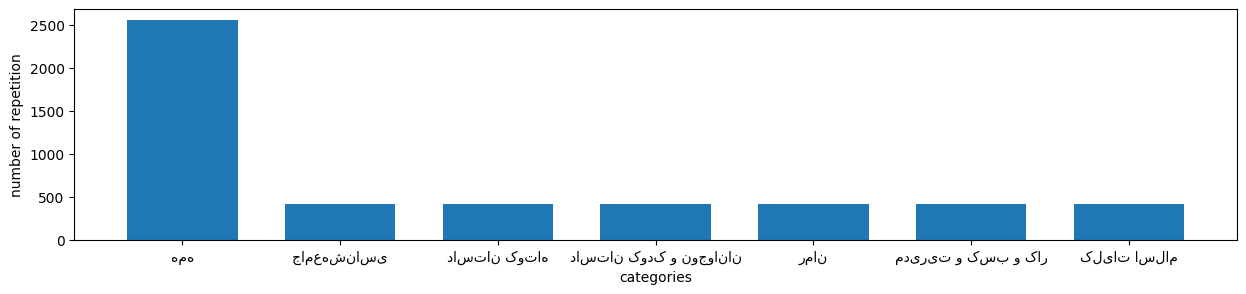

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
plt.bar(all_cats.keys(), all_cats.values(), width= 0.7)
plt.xlabel("categories")
plt.ylabel("number of repetition")
plt.show()

### Making the set of stop_words for the Phase 3
To create the set of stop_words for Phase 3, we need to remove all the unessential words from our BoW. The file 'sw.csv' contains these useless words, so I read it from the file using the hazm function stopwords_list() and convert it to a set.

In [54]:
import hazm as hz
stop_words = hz.stopwords_list("sw.csv")
stop_words = {word for word in stop_words}

### defining the function has_punctuation() for our preprocessing
I searched for the code snippet below on chatGBT that uses the regex library to accomplish this. As you can see, it checks whether our string contains any punctuation marks or not, as we should remove them from our set of all_words in the preprocessing step.

In [55]:
import re
def has_punctuation(string):
    pattern = r'[^\w\s]'   # Unicode character property for punctuation and symbols
    return re.match(pattern, string)

### Creating the set of all useful words
So, I wrote a function to add all the words to a set unless the word is a digit, a punctuation mark, or in the set of stop_words (that's for phase 3). Instead of using the functions isdigit() and has_punctuation(), I could use the function isalpha(). However, when I used isalpha() instead, the matching percentage decreased from 82.67% to 82.22%. Therefore, I preferred to use these two separate functions instead of isalpha().

In [56]:
all_words = {"کل کلمات":0}

def count_words(content):
    for word in content:
        if not (word.isdigit() or has_punctuation(word)) and word not in stop_words:
            all_words[word] = all_words.get(word, 0) + 1
            all_words["کل کلمات"] += 1

### Defining a function to normalize and lemmatize the description of each book.
(We used the function Lemmatizer() for the Phase 3) 

In [57]:
normalizer = hz.Normalizer()
lemmatizer = hz.Lemmatizer()
def process(df):
    df["description"] = df["description"].apply(lambda x: hz.word_tokenize(normalizer.normalize(x)))
# The next lines are about lemmatization
    for i in range(len(df)):
        des = [lemmatizer.lemmatize(word).split("#")[0] for word in df.loc[i]["description"]]
        for word in range(len(df.loc[i]["description"])):
            df.loc[i]["description"][word] = des[word]

### Processing our train dataframe
So initially, we need to apply the process() function to our train dataframe (df) and then count all the useful words.

(Keep in mind that unuseful words have been removed from the set of all words, but you can still see them in the dataframe because I didn't remove them from the dataframe).

In [58]:
process(df)
df["description"].apply(lambda x: count_words(x))

display(df)

,title,description,categories
0,ساختار نظریه‌های جامعه‌شناسی ایران,"[«, ساختار, نظریه, جامعه‌شناس, ایران, », نوشته...",جامعه‌شناسی
1,جامعه و فرهنگ کانادا,"[«, جامعه, و, فرهنگ, کانادا, », از, مجموعه, کت...",جامعه‌شناسی
2,پرسش از موعود,"[پرسش, مختلف, درباره, زندگی, و, شخصیت, امام, م...",کلیات اسلام
3,موج، دریا,"[«, موج, دریا, », به, قلم, مهر, ماهوت, (, -, ۱...",داستان کودک و نوجوانان
4,پرسش از غرب,"[«, پرسش, از, غرب, », به, قلم, دکتر, اسماعیل, ...",جامعه‌شناسی
...,...,...,...
2545,قضاوت‌‏های امیرمؤمنان حضرت علی علیه‏‌السلام,"[آنچه, به, عنوان, قضاوت, امیرمؤمنان, حضرت, علی...",کلیات اسلام
2546,کراماتی از مهدی موعود(عج),"[زینب, محمود, پژوهشگر, دین, , ., در, بخشی, از,...",کلیات اسلام
2547,انتقام، انتقام، انتقام,"[«, انتقام, ،, انتقام, ،, انتقام, », داستان‌گو...",داستان کوتاه
2548,آن مرد می‌آید,"[«, آن, مرد, آمد, », به, قلم, سیده‌فاطمه, موسو...",داستان کودک و نوجوانان


### Forming the BoW

In [59]:
dic1 = [{key: 0 for key in all_words.keys()} for _ in range(len(all_cats))]
genre = {key:i for i,key in enumerate(all_cats.keys())}

def add_to_BoW(i,j):
    dic1[genre[df.loc[i]["categories"]]][j] += 1
    dic1[genre[df.loc[i]["categories"]]]["کل کلمات"] += 1
    dic1[genre["همه"]][j] += 1
    dic1[genre["همه"]]["کل کلمات"] += 1

for row in range(len(df)):
    for word in df.loc[row]["description"]:
        if not (word.isdigit() or has_punctuation(word)) and not word in stop_words:
            add_to_BoW(row,word)

BoW = pd.DataFrame(dic1, index = genre.keys())
display(BoW)

,کل کلمات,ساختار,نظریه,جامعه‌شناس,ایران,نوشته,ابوالفضل,رمضان,دربردارنده,جامعه,...,پدیدآورد,منثور,بزک,جودانه‌ی,کتابفروش,کماندوهای,بهروان‌راد,خیر‌خواهی,روشن‌نگری,ذهن‌هاست
همه,241018,84,168,180,678,920,8,41,51,433,...,1,1,1,1,1,1,1,1,1,1
جامعه‌شناسی,47088,51,128,170,306,152,3,2,11,235,...,0,0,0,0,0,0,0,0,0,0
داستان کوتاه,43519,7,1,1,119,176,1,0,22,33,...,1,1,1,1,1,1,0,0,0,0
داستان کودک و نوجوانان,20315,0,0,0,44,150,2,6,6,5,...,0,0,0,0,0,0,1,1,0,0
رمان,57669,11,2,0,118,164,0,2,1,51,...,0,0,0,0,0,0,0,0,0,0
مدیریت و کسب و کار,38421,12,19,7,35,171,0,0,5,28,...,0,0,0,0,0,0,0,0,0,0
کلیات اسلام,34006,3,18,2,56,107,2,31,6,81,...,0,0,0,0,0,0,0,0,1,1


# Phase 2: Problem Solving

### Introduction

In this part, our objective is to determine the category to which a description belongs. We will accomplish this by utilizing Bayes' theorem. Our goal is to identify the category with the highest probability of being the correct one given a particular description. In other words, if we are provided with description X, we want to calculate the probability P(c|X) for each category and identify the category with the highest value. This probability P(c|X) is referred to as the posterior probability.

According to Bayes' theorem, we have the following relationship:

<img  align=center src="Bayes.png" style="margin:0;" />

Due to the fact that P(X) will be accrued in all P(c|X) for each category, and we merely want to compare them to each other (rather than calculating their probabilities exactly), we can simplify our calculations by ignoring the evidence P(X).

On the other hand, since all the categories have the same priori P(c), we can neglect calculating them. However, to ensure the code is more abstract and generalized, I don't want to remove them from the formula. In the beginning of my report, I explained how to calculate P(c) for each category. Therefore, the remaining and crucial part is to calculate the likelihood P(X|c).

To calculate the likelihood easily, we make the assumption that the occurrence of a word is independent of the occurrence of its preceding and following words, which is known as Naive Bayes. Since the words in the description are all independent, we can use the formula P(X|c) = P(x1|c) * P(x2|c) * ... * P(xn|c), where xi represents the word at position i.

### Reading book_test file and storing as a dataframe

In [60]:
test_df  = pd.read_csv("books_test.csv")
process(test_df)   
data = pd.DataFrame(test_df,columns=["description","categories","my_cat"])
display(data)

,description,categories,my_cat
0,"[«, کآشوب, (, بیست, و, سه, روایت, از, روضه, که...",داستان کوتاه,NaN
1,"[«, داستان, برق‌آسا, », نام, مجموعه, داستان, ب...",داستان کوتاه,NaN
2,"[مجموعه, مقالات, «, بحث, درباره, مرجعیت, و, رو...",کلیات اسلام,NaN
3,"[«, قلعه, حیوانات, », جورج, اورول, ،, درباره, ...",رمان,NaN
4,"[«, قصه, ما, مثل, شد, », یک, مجموعه, کتاب, ۵, ...",داستان کودک و نوجوانان,NaN
...,...,...,...
445,"[«, سیره, اقتصاد, امام, علی, (, ع, ), », نوشته...",کلیات اسلام,NaN
446,"[از, روی, بام, رفت, بر, بام, دیگر, و, رسید, هم...",رمان,NaN
447,"[«, اصالت, من, », نوشته, داریوش, قاسم, دستجردی...",جامعه‌شناسی,NaN
448,"[تأمین, مالی, آموزش, و, پرورش, عموم, فرآیند, ,...",جامعه‌شناسی,NaN


### Calculating the P(X|c) based on independent events.

##### Defining the function to return P(x1|c) using the ordinary method of calculation (without utilizing logarithm and additive smoothing).

In [61]:
def p_with_ordinary_method(word, index):
    if word in all_words and dic1[index][word]!=0:
        return dic1[index][word] / dic1[index]["کل کلمات"]
    else:
        return 1 # skips the word

In the code snippet above, I prefer to return 1 (in a way, skipping it) when the word is not found in the BoW. If we were to return 0, the multiplication of probabilities of words in a category would almost be equal to zero. However, we did not use the additive smoothing method, nor did we apply logarithm.

In [62]:
reversed_genre = {i:key for i,key in enumerate(all_cats.keys())}

import math
for j in range(len(test_df)):
    minimum = 1
    gen = 1
    for i in range(1,len(genre)):
        sum = 1.0   
        for word in test_df.loc[j]["description"]:
            sum *= p_with_ordinary_method(word,i)
        sum *= prob_of_category_c(reversed_genre[i])
        if sum < minimum:
            minimum = sum
            gen = i
    print(sum)
    data.loc[j, ["my_cat"]] = reversed_genre[gen]

display(data)

0.0
0.0
1.77293620999944e-269
0.0
2.157081913753637e-89
0.0
3.228682255093265e-64
0.0
2.0135882359259563e-153
3.6372661363346986e-90
1.497524198422931e-48
0.0
8.136574549468154e-237
5.834646323887564e-295
2.7851461983092823e-266
0.0
5.72004494614679e-31
0.0
5.784698610486745e-201
0.0
0.0
0.0
0.0
0.0
3.56471439314546e-135
8.570367011399815e-272
8.395974985776911e-49
7.732749537113062e-215
5.302866929858229e-62
4.667404041535986e-303
1.0515085502725157e-132
0.0
0.0
5.671060549893657e-131
0.0
5.207316470662939e-192
2.5966163749841313e-89
2.557057019065671e-264
1.5735443404478847e-243
7.72574975350774e-107
0.0
9.700611625550872e-157
1.0753293246352916e-192
6.735721558148807e-190
1.4447968652457673e-267
0.0
9.683427827310898e-237
7.055733217142086e-294
6.536785925768322e-164
0.0
0.0
1.1611623015739504e-37
8.131707110586313e-52
0.0
3.813830703357579e-305
0.0
7.188742182326e-312
4.1617514568796235e-164
0.0
2.0439384446728584e-233
3.2712641160704364e-302
8.395974985776911e-49
8.417955659484648

/var/folders/qy/v1g2pryd24x2x6ptc9xgsgsm0000gn/T/ipykernel_10137/2541048703.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'جامعه‌شناسی' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[j, ["my_cat"]] = reversed_genre[gen]


,description,categories,my_cat
0,"[«, کآشوب, (, بیست, و, سه, روایت, از, روضه, که...",داستان کوتاه,جامعه‌شناسی
1,"[«, داستان, برق‌آسا, », نام, مجموعه, داستان, ب...",داستان کوتاه,جامعه‌شناسی
2,"[مجموعه, مقالات, «, بحث, درباره, مرجعیت, و, رو...",کلیات اسلام,جامعه‌شناسی
3,"[«, قلعه, حیوانات, », جورج, اورول, ،, درباره, ...",رمان,جامعه‌شناسی
4,"[«, قصه, ما, مثل, شد, », یک, مجموعه, کتاب, ۵, ...",داستان کودک و نوجوانان,داستان کودک و نوجوانان
...,...,...,...
445,"[«, سیره, اقتصاد, امام, علی, (, ع, ), », نوشته...",کلیات اسلام,جامعه‌شناسی
446,"[از, روی, بام, رفت, بر, بام, دیگر, و, رسید, هم...",رمان,رمان
447,"[«, اصالت, من, », نوشته, داریوش, قاسم, دستجردی...",جامعه‌شناسی,جامعه‌شناسی
448,"[تأمین, مالی, آموزش, و, پرورش, عموم, فرآیند, ,...",جامعه‌شناسی,جامعه‌شناسی


Since we skip the 'not_found' words, a category that has the minimum amount of words of that description will have the highest possibility of being the answer. This is because if we skip a lot, the answer will be closer to 1.

In [63]:
sum = 0
for i in range(len(data)):
    if(data.loc[i,"categories"] == data.loc[i,"my_cat"]):
        sum += 1
sum = sum/len(test_df) * 100
print("{0:.2f}% matching percentage".format(sum))

25.56% matching percentage


#### The answer to the third question of Phase 3
As you can see, there is a 25.56% matching percentage when we use all the additional preprocessing steps, including lemmatization and stop word removal. Surprisingly, if we only remove the lemmatizer, the matching percentage increases to 34.89%. Similarly, if we only exclude the removal of stop words, the matching percentage is 24.00%. Finally, if we omit both the lemmatizer and the removal of stop words, the matching percentage is 28.00%.

As you may have noticed, most of the probabilities are extremely close to zero, resulting in numerical precision issues(most of them are equal to zero because of limitations of computer). To mitigate this, we utilize our second method, which involves applying logarithm to the products and converting them into summations. Here is the corresponding code:

##### Defining the function to return P(x1|c) with using logarithm(without using adittive smooth method)

In [64]:
def p_with_logarithm(word, index):
    if word in all_words and dic1[index][word]!=0:
        return math.log(dic1[index][word] / dic1[index]["کل کلمات"])
    else:
        return 0 # that is equal to log(1)

In [65]:
for j in range(len(test_df)):
    minimum = 0
    gen = 1
    for i in range(1,len(genre)):
        sum = 0.0   
        for word in test_df.loc[j]["description"]:
            sum += p_with_logarithm(word,i)
        sum += math.log(prob_of_category_c(reversed_genre[i]))
        if sum < minimum:
            minimum = sum
            gen = i
    print(sum)
    data.loc[j, ["my_cat"]] = reversed_genre[gen]

display(data)

-915.4191197216385
-1020.1300469742962
-618.8227529675212
-872.3321476772246
-204.1613169340059
-1014.2227441235372
-146.19337186818635
-1117.0873687329174
-351.5956009055764
-205.9414260314499
-110.12027125362332
-770.8704191661906
-543.6162977651613
-677.4987887822145
-611.4633343695101
-1102.059432132839
-69.63616121973661
-962.6311781521235
-461.06438743096095
-762.5301649678695
-876.8530404065102
-790.6463623705163
-782.8436642771741
-919.3679270664549
-309.5779036176638
-624.1548347375534
-110.6989171340567
-493.01033049745547
-141.0920281611608
-696.1426801398303
-303.8910064275862
-822.8211066716806
-1105.1637832564124
-299.9032710361344
-999.4224796013037
-440.4462732045965
-203.97586407322842
-606.9436075551635
-559.0748469809248
-244.33204607681844
-850.947755653044
-359.233670662363
-442.0237108916943
-435.5837427291621
-614.4222510954122
-774.9427879452459
-543.4422510865924
-675.0061768316217
-375.74650965501394
-775.3463409413512
-780.0868930666641
-85.04622695319696
-11

,description,categories,my_cat
0,"[«, کآشوب, (, بیست, و, سه, روایت, از, روضه, که...",داستان کوتاه,رمان
1,"[«, داستان, برق‌آسا, », نام, مجموعه, داستان, ب...",داستان کوتاه,داستان کوتاه
2,"[مجموعه, مقالات, «, بحث, درباره, مرجعیت, و, رو...",کلیات اسلام,جامعه‌شناسی
3,"[«, قلعه, حیوانات, », جورج, اورول, ،, درباره, ...",رمان,رمان
4,"[«, قصه, ما, مثل, شد, », یک, مجموعه, کتاب, ۵, ...",داستان کودک و نوجوانان,داستان کودک و نوجوانان
...,...,...,...
445,"[«, سیره, اقتصاد, امام, علی, (, ع, ), », نوشته...",کلیات اسلام,رمان
446,"[از, روی, بام, رفت, بر, بام, دیگر, و, رسید, هم...",رمان,رمان
447,"[«, اصالت, من, », نوشته, داریوش, قاسم, دستجردی...",جامعه‌شناسی,جامعه‌شناسی
448,"[تأمین, مالی, آموزش, و, پرورش, عموم, فرآیند, ,...",جامعه‌شناسی,کلیات اسلام


In [66]:
sum = 0
for i in range(len(data)):
    if(data.loc[i,"categories"] == data.loc[i,"my_cat"]):
        sum += 1
sum = sum/len(test_df) * 100
print("{0:.2f}% match".format(sum))

30.89% match


#### The answer to the third question of Phase 3
As you can see, there is a 30.89% matching percentage if we use all the preprocessing techniques and also lemmatizer and stop word removal. Surprisingly, if we exclude the lemmatizer, the matching percentage increases to 44.22%. Similarly, if we don't remove the stop words, the matching percentage will be 29.78%. Finally, if both the lemmatizer and the stop words are not used, the matching percentage will be 42.22%.


### Important hint on using minimum vs maximum
Note that we calculate the minimum value among the probabilities of all categories for each book, and we didn't use the maximum here. That's because if we don't have the number in our Bag of Words (BoW), and therefore skip it a lot, the value will be closer to zero, and it will be higher than the others that have that special word.

So, we use the minimum approach here and return a category that has more occurrences of the words in the corresponding description compared to the others. In other words, by using the minimum approach, we analyze the presence of a word in our training data without considering the number of repetitions of that word. 

### Matching percentage by using minimum vs maximum
If we use the maximum, the matching percentage will be 3.11%. However, as I mentioned before, if we use the minimum, the matching percentage will be 30.89%. Both approaches have their own logic. In this case, our training data is not very extensive, so we lack many of the words. Therefore, using the minimum approach is more effective than using the maximum.

### Comparison between first and the second method

As you can see, the second method (using logarithm) is approximately 9% better than the first method. However, it still falls short of the desired accuracy because we are currently skipping words that are not found and assuming their probability is 1. To address this issue and prevent skipping, we intend to implement the third method known as additive smoothing. In this method, instead of setting the probability of unfound words to 1, we assign it a very small constant value. Therefore, we have:

In [67]:
def p_with_adittive_smooth(word, index):
    if word in all_words and dic1[index][word]!=0:
        return math.log(dic1[index][word] / dic1[index]["کل کلمات"])
    else:
        return math.log(1 / (dic1[0]["کل کلمات"]))

In [68]:
for j in range(len(test_df)):
    maximum = -math.inf
    gen = 1
    for i in range(1,len(genre)):
        sum = 1.0   
        for word in test_df.loc[j]["description"]:
            sum += p_with_adittive_smooth(word,i)
        sum += math.log(prob_of_category_c(reversed_genre[i]))
        if sum > maximum:
            maximum = sum
            gen = i
    data.loc[j, ["my_cat"]] = reversed_genre[gen]

display(data)

,description,categories,my_cat
0,"[«, کآشوب, (, بیست, و, سه, روایت, از, روضه, که...",داستان کوتاه,رمان
1,"[«, داستان, برق‌آسا, », نام, مجموعه, داستان, ب...",داستان کوتاه,داستان کوتاه
2,"[مجموعه, مقالات, «, بحث, درباره, مرجعیت, و, رو...",کلیات اسلام,کلیات اسلام
3,"[«, قلعه, حیوانات, », جورج, اورول, ،, درباره, ...",رمان,رمان
4,"[«, قصه, ما, مثل, شد, », یک, مجموعه, کتاب, ۵, ...",داستان کودک و نوجوانان,داستان کودک و نوجوانان
...,...,...,...
445,"[«, سیره, اقتصاد, امام, علی, (, ع, ), », نوشته...",کلیات اسلام,کلیات اسلام
446,"[از, روی, بام, رفت, بر, بام, دیگر, و, رسید, هم...",رمان,رمان
447,"[«, اصالت, من, », نوشته, داریوش, قاسم, دستجردی...",جامعه‌شناسی,جامعه‌شناسی
448,"[تأمین, مالی, آموزش, و, پرورش, عموم, فرآیند, ,...",جامعه‌شناسی,جامعه‌شناسی


In [69]:
sum = 0
for i in range(len(data)):
    if(data.loc[i,"categories"] == data.loc[i,"my_cat"]):
        sum += 1
sum = sum/len(test_df) * 100
print("{0:.2f}% match".format(sum))

82.67% match


#### The answer to the third question of Phase 3
As you can see, there is an 82.67% matching percentage if we use all the preprocessing steps, including lemmatization and stop word removal. Without lemmatization, the matching percentage decreases to 82.00%. Similarly, without removing stop words, the matching percentage becomes 80.67%. Lastly, if we exclude both lemmatization and stop word removal, the matching percentage is 81.11%.

### Comparison
As you can see, the third method provides us with a higher level of correctness compared to the other two methods. In fact, it is approximately 45% better than the second method.

## Answering the questions of Phase 2

#### First question
If we choose not to use the additive smoothing method, I believe we should exclude the new words. In other words, we should consider their likelihoods to be equal to 1. Although this is not ideal, it is a better approach than assigning a probability of zero to a new word. When we multiply different terms, assigning a probability of zero would yield zero overall, which is nonsensical. However, the most effective approach is to assign an extremely small probability to new words, and this can be achieved by employing the additive smoothing method.

##### using a simplified adittive smooth method
I think the value considered for the probability of a new word should be lower than the probability of words included in BoW. Therefore, I suggest using a value of 1 divided by the number of words in our BoW. Even if we consider half of this value, it wouldn't significantly alter the main formula. Although it can be disregarded for the main formula, it can still be applied to novel words without making a substantial difference.

### Second question

As you may have considered, when calculating using the first method (ordinary calculating without using logarithm and additive smooth method), we encounter values that are close to zero or exactly zero. This is because when dealing with a long description with numerous words, multiplying all the probabilities of each word results in a significantly small number that computers may consider as zero in certain cases. In order to handle these situations where we encounter a large number of words, we can utilize logarithms to prevent this from occurring. It is common knowledge that if "a" is greater than "b," then log(a) will be greater than log(b). Since we are only comparing the probabilities of the description belonging to each category, we can compare their respective logged values to one another.


# Phase 3: Bonus

I've already answered the questions for Phase 3 in my report, but I'll write them here again.

### The first method: the ordinary one

As you can see, there is a 25.56% matching percentage when we use all the additional preprocessing steps, including lemmatization and stop word removal. Surprisingly, if we only remove the lemmatizer, the matching percentage increases to 34.89%. Similarly, if we only exclude the removal of stop words, the matching percentage is 24.00%. Finally, if we omit both the lemmatizer and the removal of stop words, the matching percentage is 28.00%.

### The second method: using logarithm

As you can see, there is a 30.89% matching percentage if we use all the preprocessing techniques and also lemmatizer and stop word removal. Surprisingly, if we exclude the lemmatizer, the matching percentage increases to 44.22%. Similarly, if we don't remove the stop words, the matching percentage will be 29.78%. Finally, if both the lemmatizer and the stop words are not used, the matching percentage will be 42.22%.

### The third method: applying adattive smooth method

As you can see, there is an 82.67% matching percentage if we use all the preprocessing steps, including lemmatization and stop word removal. Without lemmatization, the matching percentage decreases to 82.00%. Similarly, without removing stop words, the matching percentage becomes 80.67%. Lastly, if we exclude both lemmatization and stop word removal, the matching percentage is 81.11%.

### Some important things to say

##### Difference between stemmize and lemmatize in matching percentage
Without lemmatization, it is 82.00% 😊 but when we lemmatize and don't stemmize, it increases to 82.67% 😄. However, with stemming and without lemmatization, it drops to 78.00% 😐. If we apply lemmatization first and then stemming, the accuracy remains at 78.00% 😐. On the other hand, if we apply stemming first and then lemmatization, the accuracy goes back up to 82.67% 😄. Therefore, lemmatization appears to be more effective than stemming, which is why I used lemmatization instead of stemming in my code. 👍

I tried 🤔 adding the words in the titles 📚 to the set of all words 📝, but it didn't 🚫 change the matching percentage 📊, and the best matching percentage is still 82.67% 📈.

If we don't have isdigit() and has_punctuation(), it is still 82.67%. If we only add the function isdigit(), it will be 81.78%; and if we only have the has_punctuation() function, it will be 82.00%.

At last, I should say that I use chatGBT to make my english report more readable for you.
Thanks :D